In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv("D:\Py Django\DataScience\Decision Tree\Classification\weather_data.csv")
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,No,No
1,Sunny,Hot,High,Yes,No
2,Overcast,Hot,High,No,Yes
3,Rainy,Mild,High,No,Yes
4,Rainy,Cool,Normal,No,Yes
5,Rainy,Cool,Normal,Yes,No
6,Overcast,Cool,Normal,Yes,Yes
7,Sunny,Mild,High,No,No
8,Sunny,Cool,Normal,No,Yes
9,Rainy,Mild,Normal,No,Yes


In [4]:
a = LabelEncoder()
df['Outlook'] = a.fit_transform(df['Outlook'])
df['Temperature'] = a.fit_transform(df['Temperature'])
df['Humidity'] = a.fit_transform(df['Humidity'])
df['Windy'] = a.fit_transform(df['Windy'])
df

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,0,No
1,2,1,0,1,No
2,0,1,0,0,Yes
3,1,2,0,0,Yes
4,1,0,1,0,Yes
5,1,0,1,1,No
6,0,0,1,1,Yes
7,2,2,0,0,No
8,2,0,1,0,Yes
9,1,2,1,0,Yes


In [5]:
x=df.drop('Play',axis = 1)
y = df['Play']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=41)

In [7]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3, random_state=41)
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,41
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
y_pred = model.predict(x_test)
y_pred

array(['No', 'No', 'Yes', 'No', 'Yes'], dtype=object)

In [9]:
accuracy = accuracy_score(y_pred,y_test)
print(f"{accuracy * 100:.2f}%")

60.00%


[Text(0.4, 0.875, 'Outlook <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]\nclass = will play'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = will play'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'Windy <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = will not play'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'Outlook <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = will play'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = will play'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = will not play'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = will not play')]

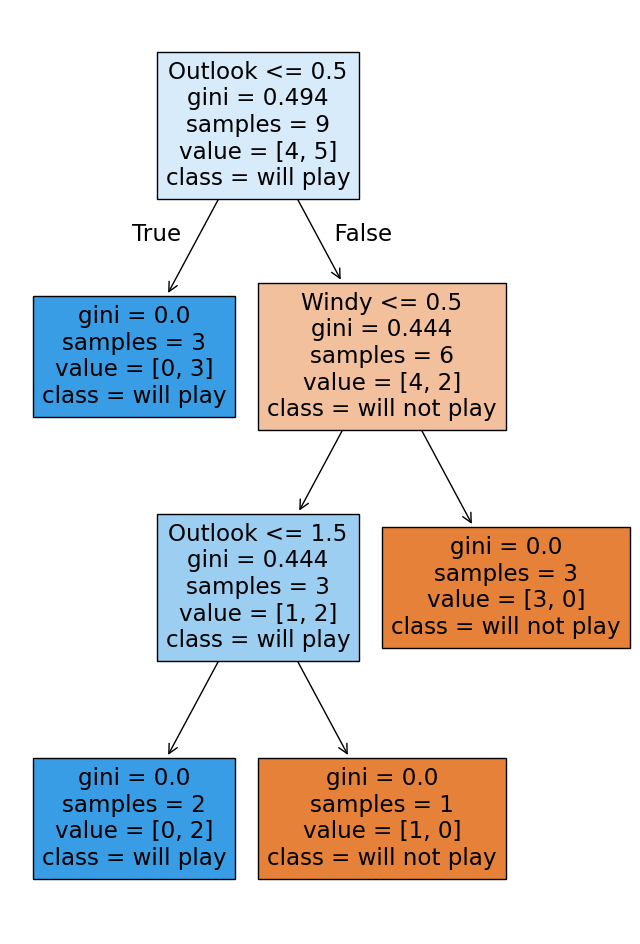

In [10]:
plt.figure(figsize=(8,12))
plot_tree(model,feature_names=["Outlook","Temperature","Humidity","Windy"],class_names=["will not play","will play"],filled=True)

In [11]:
new_data = np.array([[2,1,1,0]])
prediction = model.predict(new_data)
print("play" if prediction[0] == 1 else "not play")

not play


c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
